In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./database/height-weight.csv')
X = df['Weight'].values
y = df['Height'].values
m = len(y)

In [3]:
X_mean, X_std = np.mean(X), np.std(X)
y_mean, y_std = np.mean(y), np.std(y)
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

In [4]:
def cost_function(theta0, theta1, x, y):
    m = len(x)
    y_pred = theta0 + theta1 * x
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

In [5]:
# Iterations = how many times the convergence (update) algorithm is allowed to run while moving toward
# the minimum of the cost function.
def gradient_descent_convergence(X, y, alpha=0.1, max_iters=1000, epsilon=1e-6):
    theta0, theta1 = 0.0, 0.0
    cost_history = []

    prev_cost = float('inf')
    m = len(y)

    for i in range(max_iters):
        predictions = theta0 + theta1 * X

        dtheta0 = (1 / m) * np.sum(predictions - y)
        dtheta1 = (1 / m) * np.sum((predictions - y) * X)

        theta0 -= alpha * dtheta0
        theta1 -= alpha * dtheta1

        cost = cost_function(theta0, theta1, X, y)
        cost_history.append(cost)

        if abs(prev_cost - cost) < epsilon:
            print(f"Converged at iteration {i}")
            break

        prev_cost = cost

    return theta0, theta1, cost_history

In [6]:
alpha = 0.1
theta0, theta1, cost_history = gradient_descent_convergence(
    X_scaled, y_scaled, alpha=alpha
)

Converged at iteration 55


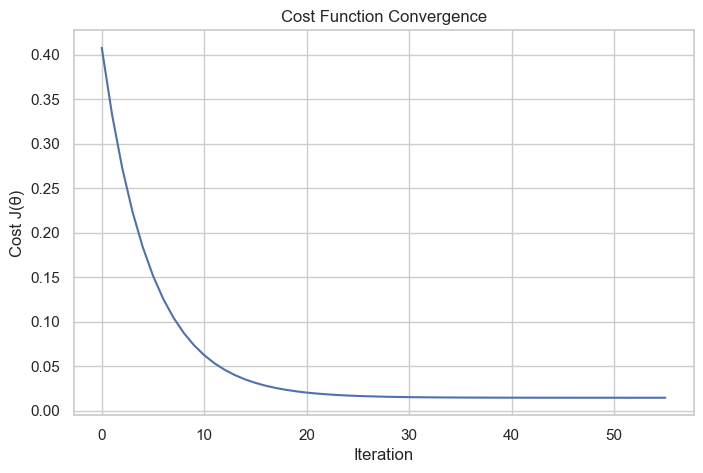

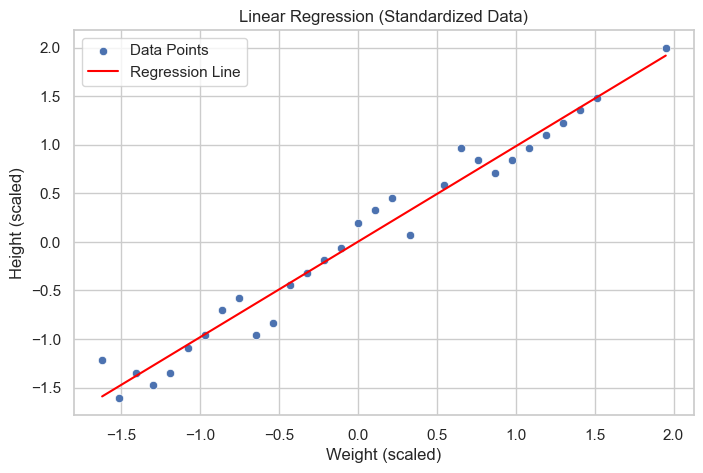

In [7]:
sns.set_theme(style="whitegrid")

# Plot 1: Cost vs Iterations
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(len(cost_history)), y=cost_history)
plt.title("Cost Function Convergence")
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.show()

# Plot 2: Regression Line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_scaled, y=y_scaled, label="Data Points")
line_x = np.linspace(X_scaled.min(), X_scaled.max(), 100)
line_y = theta0 + theta1 * line_x
sns.lineplot(x=line_x, y=line_y, color="red", label="Regression Line")
plt.title("Linear Regression (Standardized Data)")
plt.xlabel("Weight (scaled)")
plt.ylabel("Height (scaled)")
plt.legend()
plt.show()

In [8]:
print(f"Optimal Parameters:")
print(f"Intercept (θ0): {theta0:.4f}")
print(f"Slope (θ1): {theta1:.4f}")

Optimal Parameters:
Intercept (θ0): -0.0000
Slope (θ1): 0.9828
